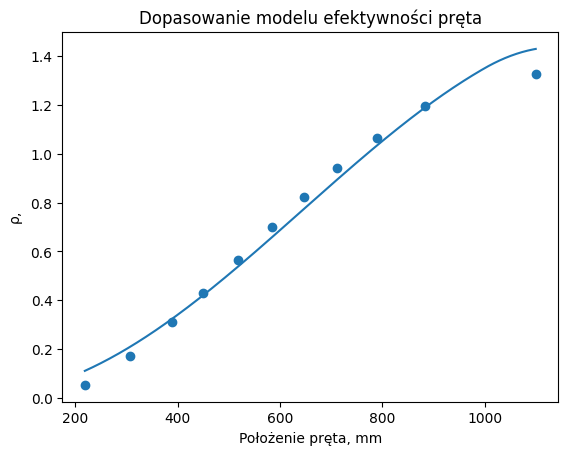

a = 0.001866061028408262
b = 0.0028442549324680386
rho_dollar = [0.05194 0.17051 0.30894 0.4273  0.56305 0.69909 0.82355 0.94204 1.06649
 1.19635 1.3258 ]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

rho_dollar_delta = np.array([
    0.05194,
    0.11857,
    0.13843,
    0.11836,
    0.13575,
    0.13604,
    0.12446,
    0.11849,
    0.12445,
    0.12986,
    0.12945
])

Położenie_preta = np.array([
    219.0,
    307.3,
    388.9,
    450.0,
    517.6,
    584.0,
    646.0,
    712.0,
    790.0,
    883.0,
    1099.3
])

rho_dollar = np.cumsum(rho_dollar_delta)

H = 1286.0
L = 1000.0

def efektywnosc(z, H, L):
 
    z = np.asarray(z, dtype=float)

    indexy = np.zeros_like(z, dtype=int)
    indexy[(z >  -H/2)      & (z <  -H/2 + L)] = 1
    indexy[(z >= -H/2 + L)  & (z <   H/2)]     = 2
    indexy[(z >=  H/2)      & (z <   H/2 + L)] = 3

    wzory = [
        np.zeros_like(z),  # index 0
        (H/np.pi) * (np.sin(np.pi * z / H) + 1.0),                          # index 1
        (H/np.pi) * (np.sin(np.pi * z / H) - np.sin(np.pi * (z - L) / H)),  # index 2
        (H/np.pi) * (1.0 - np.sin(np.pi * (z - L) / H))                     # index 3
    ]

    return np.choose(indexy, wzory)

X = Położenie_preta
Y = rho_dollar

z = X - H/2

model = efektywnosc(z, H, L)
A = np.column_stack([model, np.ones_like(model)])
a, b = np.linalg.lstsq(A, Y, rcond=None)[0]

x_plot = np.linspace(X.min(), X.max(), 400)
z_plot = x_plot - H/2
y_plot = a * efektywnosc(z_plot, H, L) + b

plt.figure()
plt.scatter(X, Y)
plt.plot(x_plot, y_plot)
plt.xlabel("Położenie pręta, mm")
plt.ylabel("ρ$, $")
plt.title("Dopasowanie modelu efektywności pręta")
plt.show()

print("a =", a)
print("b =", b)
print("rho_dollar =", rho_dollar)
